# Neural Network Model

This notebook is practicing the basic Neural Network to classify the given image.

## Libraries

Importing necessary Libraries. Module 'util' and 'malig_data' is formed to make the note book mote delicate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import util as ut

from datetime import datetime
import random

from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import util as ut #Checking the result 
from malig_data import * #Accessing Data

train_img shape (5421, 12288)
train_images shape (5421, 64, 64, 3)
train_labels shape (5421, 2)
test_img shape (1355, 12288)
test_images shape (1355, 64, 64, 3)
test_labels shape (1355, 2)
val_img shape (753, 12288)
val_images shape (753, 64, 64, 3)
val_labels shape (753, 2)
smote_img shape (9358, 12288)
smote_images shape (9358, 64, 64, 3)
smote_labels shape (9358,)
adasyn_img shape (9265, 12288)
adasyn_images shape (9265, 64, 64, 3)
adasyn_labels shape (9265,)
train_y shape (5421, 1)
test_y shape (1355, 1)
val_y shape (753, 1)


## Fitting Neural Network Model

We will start with the simple Nueral network with about 3 hidden layers.

In [7]:
def NN_model(x, y, val_x, val_y, epochs=150, batch_size=32):
    """Neural Network model function that returns the model and the history
        x: train image
        y: train target
        val_x: test image
        val_y: test target
        epoches: default at 150
        batch_size: default at 32
    """
    start_time=datetime.now()# To check how long each model run
    random.seed(123)
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(x.shape[1],))) #1st hidden layers
    model.add(layers.Dense(7, activation='relu'))#2nd hidden layers
    model.add(layers.Dense(5, activation='relu'))#3rd hidden layers
    model.add(layers.Dense(1, activation='sigmoid'))#output layer
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_x, val_y))
    end_time=datetime.now()
    print('Time elapsed: ', end_time - start_time)
    return model, history

In [8]:
basic_model, basic_history = NN_model(train_img, train_y, 
                                      test_img, test_y,
                                      epochs=250, batch_size=32)

Epoch 1/250
170/170 [==============================] - 3s 18ms/step - loss: 0.3518 - accuracy: 0.8631 - val_loss: 0.3253 - val_accuracy: 0.8642
Epoch 2/250
170/170 [==============================] - 1s 7ms/step - loss: 0.3306 - accuracy: 0.8631 - val_loss: 0.3127 - val_accuracy: 0.8642
Epoch 3/250
170/170 [==============================] - 1s 7ms/step - loss: 0.3160 - accuracy: 0.8648 - val_loss: 0.3200 - val_accuracy: 0.8649
Epoch 4/250
170/170 [==============================] - 1s 7ms/step - loss: 0.2989 - accuracy: 0.8648 - val_loss: 0.2682 - val_accuracy: 0.8701
Epoch 5/250
170/170 [==============================] - 1s 7ms/step - loss: 0.2858 - accuracy: 0.8692 - val_loss: 0.2473 - val_accuracy: 0.8841
Epoch 6/250
170/170 [==============================] - 1s 7ms/step - loss: 0.2733 - accuracy: 0.8814 - val_loss: 0.2421 - val_accuracy: 0.8996
Epoch 7/250
170/170 [==============================] - 1s 7ms/step - loss: 0.2682 - accuracy: 0.8886 - val_loss: 0.2594 - val_accuracy: 0.915

Epoch 58/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1804 - accuracy: 0.9364 - val_loss: 0.1519 - val_accuracy: 0.9446
Epoch 59/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1778 - accuracy: 0.9369 - val_loss: 0.1604 - val_accuracy: 0.9424
Epoch 60/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1815 - accuracy: 0.9358 - val_loss: 0.1616 - val_accuracy: 0.9446
Epoch 61/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1785 - accuracy: 0.9369 - val_loss: 0.1780 - val_accuracy: 0.9432
Epoch 62/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1793 - accuracy: 0.9360 - val_loss: 0.1950 - val_accuracy: 0.9343
Epoch 63/250
170/170 [==============================] - 1s 7ms/step - loss: 0.1798 - accuracy: 0.9362 - val_loss: 0.1476 - val_accuracy: 0.9498
Epoch 64/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1801 - accuracy: 0.9349 - val_loss: 0.1469 - val_accuracy:

170/170 [==============================] - 1s 6ms/step - loss: 0.1301 - accuracy: 0.9557 - val_loss: 0.1534 - val_accuracy: 0.9520
Epoch 171/250
170/170 [==============================] - 1s 5ms/step - loss: 0.1299 - accuracy: 0.9531 - val_loss: 0.1524 - val_accuracy: 0.9520
Epoch 172/250
170/170 [==============================] - 1s 7ms/step - loss: 0.1370 - accuracy: 0.9522 - val_loss: 0.1708 - val_accuracy: 0.9395
Epoch 173/250
170/170 [==============================] - 1s 5ms/step - loss: 0.1258 - accuracy: 0.9557 - val_loss: 0.1490 - val_accuracy: 0.9491
Epoch 174/250
170/170 [==============================] - 1s 6ms/step - loss: 0.1287 - accuracy: 0.9548 - val_loss: 0.1616 - val_accuracy: 0.9476
Epoch 175/250
170/170 [==============================] - 1s 5ms/step - loss: 0.1320 - accuracy: 0.9530 - val_loss: 0.2527 - val_accuracy: 0.9351
Epoch 176/250
170/170 [==============================] - 1s 5ms/step - loss: 0.1285 - accuracy: 0.9543 - val_loss: 0.1414 - val_accuracy: 0.9535

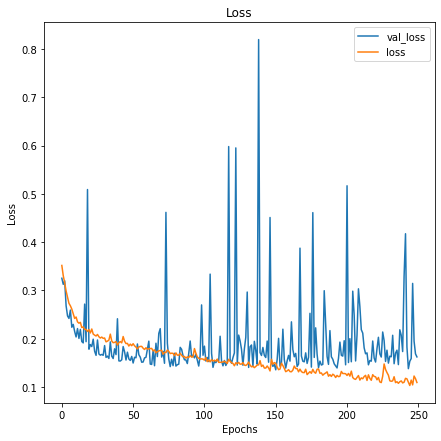

In [11]:
title = "../reports/Basic_Model: Iteration of Loss Graph Train vs Val"
ut.training_results_Loss(basic_history, title=title)

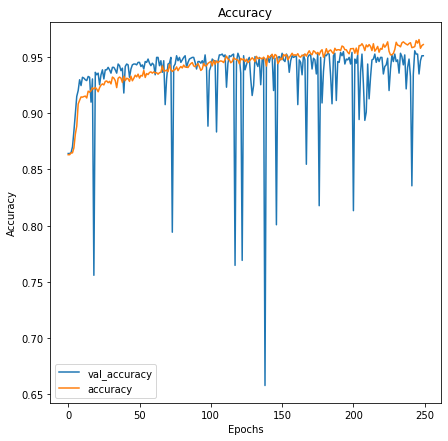

In [12]:
title = "../reports/Basic_Model: Iteration of Accuracy Graph Train vs Val"
ut.training_results_Accuracy(basic_history, title=title)

In [13]:
filepath = '../models/basic_NN.h5'
basic_model.save(filepath)

In [14]:
basic_results_train = basic_model.evaluate(train_img, train_y)
print(f'Training Loss: {basic_results_train[0]:.3} \nTraining Accuracy: {basic_results_train[1]:.3}')

print('----------')

basic_results_test = basic_model.evaluate(val_img, val_y)
print(f'Test Loss: {basic_results_test[0]:.3} \nTest Accuracy: {basic_results_test[1]:.3}')

170/170 [==============================] - 1s 4ms/step - loss: 0.0996 - accuracy: 0.9655
Training Loss: 0.0996 
Training Accuracy: 0.966
----------
24/24 [==============================] - 0s 4ms/step - loss: 0.1975 - accuracy: 0.9363
Test Loss: 0.198 
Test Accuracy: 0.936


In [16]:
index=["Actual Malig", "Actual Benign"]
columns=["Predicted Malig", "Predicted Benign"]
basic_predictions = basic_model.predict_classes(val_img)
basic_cm = confusion_matrix(val_y, basic_predictions, labels=[0,1],)
ut.cm_df(basic_cm, index, columns)

W1212 14:36:50.835464 4551073216 deprecation.py:323] From <ipython-input-16-c4b0ebb987e6>:3: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,Predicted Malig,Predicted Benign
Actual Malig,87,34
Actual Benign,14,618


Wow! Model performance was great! 93% was it a luck? Time to check if we can bring up the accuracy of the model by using other class imbalance mitigators. SMOTE and ADASYN techniques.

## Fitting SMOTE Model

In [17]:
smote_model, smote_history = NN_model(smote_img, smote_labels, 
                                      test_img, test_y,
                                      epochs=250, batch_size=32)

Epoch 1/250
285/293 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6327

W1212 14:37:08.511064 4551073216 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0051s vs `on_test_batch_end` time: 0.0105s). Check your callbacks.


293/293 [==============================] - 3s 11ms/step - loss: 0.6374 - accuracy: 0.6352 - val_loss: 0.3353 - val_accuracy: 0.9107
Epoch 2/250
293/293 [==============================] - 2s 7ms/step - loss: 0.5493 - accuracy: 0.7570 - val_loss: 0.2426 - val_accuracy: 0.9181
Epoch 3/250
293/293 [==============================] - 2s 7ms/step - loss: 0.4909 - accuracy: 0.7764 - val_loss: 0.3930 - val_accuracy: 0.8613
Epoch 4/250
293/293 [==============================] - 2s 6ms/step - loss: 0.4631 - accuracy: 0.7906 - val_loss: 0.4666 - val_accuracy: 0.8170
Epoch 5/250
293/293 [==============================] - 2s 6ms/step - loss: 0.4517 - accuracy: 0.8018 - val_loss: 0.4527 - val_accuracy: 0.8148
Epoch 6/250
293/293 [==============================] - 2s 7ms/step - loss: 0.4363 - accuracy: 0.8046 - val_loss: 1.0415 - val_accuracy: 0.3631
Epoch 7/250
293/293 [==============================] - 2s 6ms/step - loss: 0.4277 - accuracy: 0.8083 - val_loss: 0.3975 - val_accuracy: 0.8354
Epoch 8/25

293/293 [==============================] - 2s 6ms/step - loss: 0.2634 - accuracy: 0.8913 - val_loss: 0.2683 - val_accuracy: 0.8797
Epoch 59/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2539 - accuracy: 0.8956 - val_loss: 0.3009 - val_accuracy: 0.8827
Epoch 60/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2559 - accuracy: 0.8920 - val_loss: 0.1903 - val_accuracy: 0.9203
Epoch 61/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2635 - accuracy: 0.8919 - val_loss: 0.3164 - val_accuracy: 0.8664
Epoch 62/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2552 - accuracy: 0.8966 - val_loss: 0.2289 - val_accuracy: 0.9100
Epoch 63/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2489 - accuracy: 0.8972 - val_loss: 0.2046 - val_accuracy: 0.9114
Epoch 64/250
293/293 [==============================] - 2s 7ms/step - loss: 0.2486 - accuracy: 0.8984 - val_loss: 0.1880 - val_accuracy: 0.9410
Epoch

Epoch 115/250
293/293 [==============================] - 2s 6ms/step - loss: 0.2014 - accuracy: 0.9212 - val_loss: 1.0904 - val_accuracy: 0.5144
Epoch 116/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1962 - accuracy: 0.9238 - val_loss: 0.3305 - val_accuracy: 0.8819
Epoch 117/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1958 - accuracy: 0.9247 - val_loss: 0.1903 - val_accuracy: 0.9351
Epoch 118/250
293/293 [==============================] - 2s 7ms/step - loss: 0.2006 - accuracy: 0.9203 - val_loss: 0.2117 - val_accuracy: 0.9277
Epoch 119/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1966 - accuracy: 0.9210 - val_loss: 0.2316 - val_accuracy: 0.9203
Epoch 120/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1901 - accuracy: 0.9263 - val_loss: 0.1919 - val_accuracy: 0.9343
Epoch 121/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1959 - accuracy: 0.9262 - val_loss: 0.3187 - val_ac

293/293 [==============================] - 2s 6ms/step - loss: 0.1276 - accuracy: 0.9532 - val_loss: 0.3248 - val_accuracy: 0.9063
Epoch 228/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1341 - accuracy: 0.9503 - val_loss: 0.3076 - val_accuracy: 0.9454
Epoch 229/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1359 - accuracy: 0.9477 - val_loss: 0.2648 - val_accuracy: 0.9321
Epoch 230/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1309 - accuracy: 0.9532 - val_loss: 0.2384 - val_accuracy: 0.9262
Epoch 231/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1349 - accuracy: 0.9498 - val_loss: 0.2240 - val_accuracy: 0.9321
Epoch 232/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1281 - accuracy: 0.9493 - val_loss: 0.3286 - val_accuracy: 0.9122
Epoch 233/250
293/293 [==============================] - 2s 6ms/step - loss: 0.1469 - accuracy: 0.9454 - val_loss: 0.2079 - val_accuracy: 0.9387

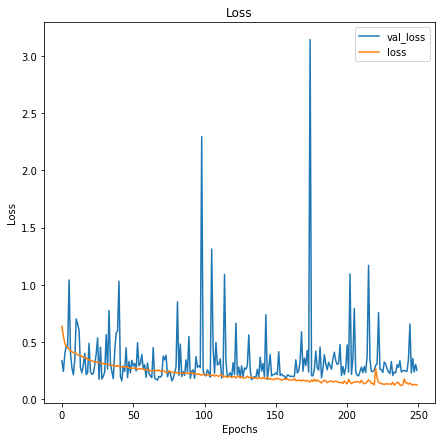

In [18]:
title = "../reports/SMOTE_NN_Model: Iteration of Loss Graph Train vs Val"
ut.training_results_Loss(smote_history, title=title)

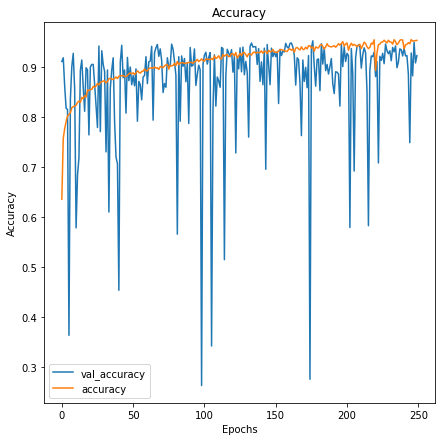

In [19]:
title = "../reports/SMOTE_NN_Model: Iteration of Accuracy Graph Train vs Val"
ut.training_results_Accuracy(smote_history, title=title)

In [20]:
filepath = '../models/SMOTE_NN.h5'
smote_model.save(filepath)

In [21]:
smote_results_train = smote_model.evaluate(smote_img, smote_labels)
print(f'Training Loss: {smote_results_train[0]:.3} \nTraining Accuracy: {smote_results_train[1]:.3}')

print('----------')

smote_results_test = smote_model.evaluate(val_img, val_y)
print(f'Test Loss: {smote_results_test[0]:.3} \nTest Accuracy: {smote_results_test[1]:.3}')

293/293 [==============================] - 2s 6ms/step - loss: 0.0903 - accuracy: 0.9677
Training Loss: 0.0903 
Training Accuracy: 0.968
----------
24/24 [==============================] - 0s 8ms/step - loss: 0.3517 - accuracy: 0.8977
Test Loss: 0.352 
Test Accuracy: 0.898


In [22]:
smote_predictions = smote_model.predict_classes(val_img)
smote_cm = confusion_matrix(val_y, smote_predictions, labels=[0,1],)
ut.cm_df(smote_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,106,15
Actual Benign,62,570


Though overall model had the accuracy of 89.8%, the model's recall was at 87% which makes it a great model. The model was overtrained.

## Fitting ADASYN Model

In [23]:
adasyn_model, adasyn_history = NN_model(adasyn_img, adasyn_labels,
                                        test_img, test_y,
                                        epochs=250, batch_size=32)

Epoch 1/250
290/290 [==============================] - 3s 12ms/step - loss: 0.6569 - accuracy: 0.6128 - val_loss: 0.4055 - val_accuracy: 0.8760
Epoch 2/250
290/290 [==============================] - 2s 7ms/step - loss: 0.5972 - accuracy: 0.7062 - val_loss: 0.5828 - val_accuracy: 0.7845
Epoch 3/250
290/290 [==============================] - 2s 6ms/step - loss: 0.5489 - accuracy: 0.7375 - val_loss: 0.5645 - val_accuracy: 0.7926
Epoch 4/250
290/290 [==============================] - 2s 7ms/step - loss: 0.5082 - accuracy: 0.7656 - val_loss: 0.4787 - val_accuracy: 0.8266
Epoch 5/250
290/290 [==============================] - 2s 6ms/step - loss: 0.4848 - accuracy: 0.7752 - val_loss: 0.2629 - val_accuracy: 0.9203
Epoch 6/250
290/290 [==============================] - 2s 7ms/step - loss: 0.4566 - accuracy: 0.7897 - val_loss: 0.5466 - val_accuracy: 0.7756
Epoch 7/250
290/290 [==============================] - 2s 6ms/step - loss: 0.4371 - accuracy: 0.8002 - val_loss: 0.3805 - val_accuracy: 0.866

Epoch 58/250
290/290 [==============================] - 2s 5ms/step - loss: 0.2296 - accuracy: 0.9097 - val_loss: 0.2418 - val_accuracy: 0.9129
Epoch 59/250
290/290 [==============================] - 2s 5ms/step - loss: 0.2379 - accuracy: 0.9049 - val_loss: 0.3099 - val_accuracy: 0.8760
Epoch 60/250
290/290 [==============================] - 2s 5ms/step - loss: 0.2277 - accuracy: 0.9110 - val_loss: 0.2007 - val_accuracy: 0.9336
Epoch 61/250
290/290 [==============================] - 2s 5ms/step - loss: 0.2281 - accuracy: 0.9125 - val_loss: 0.1785 - val_accuracy: 0.9446
Epoch 62/250
290/290 [==============================] - 2s 6ms/step - loss: 0.2212 - accuracy: 0.9139 - val_loss: 0.2835 - val_accuracy: 0.8937
Epoch 63/250
290/290 [==============================] - 2s 5ms/step - loss: 0.2256 - accuracy: 0.9111 - val_loss: 0.4705 - val_accuracy: 0.8044
Epoch 64/250
290/290 [==============================] - 2s 6ms/step - loss: 0.2305 - accuracy: 0.9072 - val_loss: 0.2237 - val_accuracy:

Epoch 115/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1716 - accuracy: 0.9348 - val_loss: 0.2356 - val_accuracy: 0.9188
Epoch 116/250
290/290 [==============================] - 2s 6ms/step - loss: 0.1464 - accuracy: 0.9464 - val_loss: 0.2502 - val_accuracy: 0.9240
Epoch 117/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1528 - accuracy: 0.9430 - val_loss: 0.2560 - val_accuracy: 0.9395
Epoch 118/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1620 - accuracy: 0.9410 - val_loss: 0.2013 - val_accuracy: 0.9387
Epoch 119/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1351 - accuracy: 0.9506 - val_loss: 0.2464 - val_accuracy: 0.9203
Epoch 120/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1509 - accuracy: 0.9447 - val_loss: 0.2435 - val_accuracy: 0.9417
Epoch 121/250
290/290 [==============================] - 2s 5ms/step - loss: 0.1438 - accuracy: 0.9475 - val_loss: 0.2455 - val_ac

290/290 [==============================] - 2s 6ms/step - loss: 0.0756 - accuracy: 0.9754 - val_loss: 0.2641 - val_accuracy: 0.9351
Epoch 228/250
290/290 [==============================] - 2s 6ms/step - loss: 0.0920 - accuracy: 0.9700 - val_loss: 0.3738 - val_accuracy: 0.9336
Epoch 229/250
290/290 [==============================] - 2s 7ms/step - loss: 0.0894 - accuracy: 0.9701 - val_loss: 0.2655 - val_accuracy: 0.9410
Epoch 230/250
290/290 [==============================] - 2s 6ms/step - loss: 0.0726 - accuracy: 0.9768 - val_loss: 0.3919 - val_accuracy: 0.9387
Epoch 231/250
290/290 [==============================] - 2s 6ms/step - loss: 0.0787 - accuracy: 0.9741 - val_loss: 0.2781 - val_accuracy: 0.9203
Epoch 232/250
290/290 [==============================] - 1s 5ms/step - loss: 0.1098 - accuracy: 0.9670 - val_loss: 2.0647 - val_accuracy: 0.3535
Epoch 233/250
290/290 [==============================] - 1s 5ms/step - loss: 0.0849 - accuracy: 0.9713 - val_loss: 0.3456 - val_accuracy: 0.9055

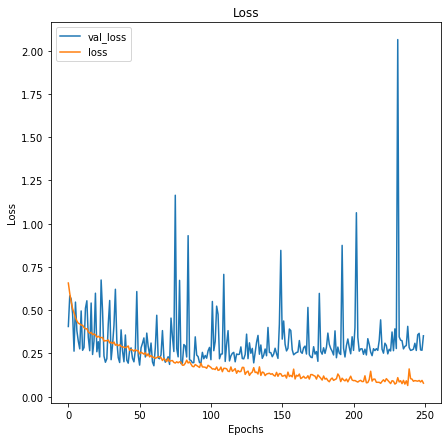

In [24]:
title = "../reports/ADASYN_NN_Model: Iteration of Loss Graph Train vs Val"
ut.training_results_Loss(adasyn_history, title=title)

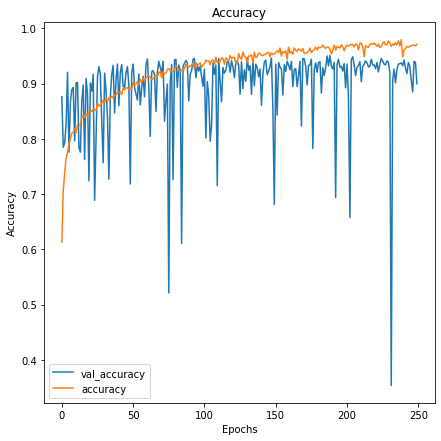

In [25]:
title = "../reports/ADASYN_NN_Model: Iteration of Accuracy Graph Train vs Val"
ut.training_results_Accuracy(adasyn_history, title=title)

In [26]:
filepath = '../models/ADASYN_NN.h5'
adasyn_model.save(filepath)

In [27]:
adasyn_results_train = adasyn_model.evaluate(adasyn_img, adasyn_labels)
print(f'Training Loss: {adasyn_results_train[0]:.3} \nTraining Accuracy: {adasyn_results_train[1]:.3}')

print('----------')

adasyn_results_test = adasyn_model.evaluate(val_img, val_y)
print(f'Test Loss: {adasyn_results_test[0]:.3} \nTest Accuracy: {adasyn_results_test[1]:.3}')

290/290 [==============================] - 2s 6ms/step - loss: 0.0915 - accuracy: 0.9662
Training Loss: 0.0915 
Training Accuracy: 0.966
----------
24/24 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.8884
Test Loss: 0.423 
Test Accuracy: 0.888


In [28]:
adasyn_predictions = adasyn_model.predict_classes(val_img)
adasyn_cm = confusion_matrix(val_y, adasyn_predictions, labels=[0,1],)
ut.cm_df(adasyn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,100,21
Actual Benign,63,569


Overall Accuracy is at 88.8%; The model was overtrained.

## Conclusion

Overall, Neural Network performance exhibited 93% accuracy which is a great result but not to the satisfaction. By applying smote and adasyn technique to the model, it definitely had a balanced/stable result. Most of the models were overtrained.

Sometimes simple is better than complicated.

The Future work is to find a right parameter to mitigate overtraining of the model.

Next will be CNN machine learning to compare the result with Neural Network model.